In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

There are 12 wells, the well N2 is one of those wells which is pretty complete, that's why it's being analyzed.

- Core facies -> facies description, code = 0 when no description and has a number when we do have some core description. Core facies from 22 to 27
- Phi H and Phi V -> porosity data  (horizontal, vertical), it's a __scalar__ and does not vary with direction, it should be the same. From a practical point of view there is a difference because of the way they are cut in the lab.
- log KV, log KH -> intrinsic permeability determined in the lab. Unlike $\phi$ need 2 measurements because it's a __tensor__ and not a scalar

## Geology
- Brent on top
- Tarbet on bottom (shoreface)

In [2]:
n2:pd.DataFrame = pd.read_csv("George.csv") # from N2.las
core_facies:dict = {
    22:"Clean sandstone",
    23:"Feldspathic sandstone",
    24:"Micacesous sandstone",
    25:"shitty shale",
    26:"shale",
    27:"coal",
    0:"no label" # no label
}
n2.describe()

,DEPTH,NPHI,RHOB,SGR(=GR),COREFACIES,PHIH,PHIV,MARKERS,PHIE,SWE,VSH,POTA,LOGKH,LOGKV
count,1609.000000,1401.000000,1401.000000,1401.000000,1401.000000,422.000000,111.000000,6.000000,1400.000000,1400.000000,1401.000000,1401.000000,391.000000,111.000000
mean,3306.043878,0.216927,2.423426,61.260677,3.571021,14.927014,15.003604,4.166667,10.387643,0.730956,0.320241,0.201968,1.373251,1.018126
std,80.854316,0.088241,0.162188,26.132569,8.652216,5.510403,5.259345,3.188521,7.958618,0.317975,0.336113,0.087722,1.514431,1.520406
min,3167.000000,0.066000,1.528000,14.679000,0.000000,0.600000,1.900000,1.000000,0.000000,0.033000,0.000000,0.029000,-2.000000,-2.000000
25%,3235.800000,0.150000,2.326000,40.517000,0.000000,11.525000,11.450000,2.250000,1.965000,0.626000,0.018000,0.129000,-0.058500,-0.180500
50%,3304.200000,0.195000,2.402000,58.094000,0.000000,15.800000,15.500000,3.500000,11.630000,0.850000,0.206000,0.208000,1.842000,1.233000
75%,3376.800000,0.285000,2.557000,84.340000,0.000000,19.175000,19.150000,4.750000,16.830000,1.000000,0.525000,0.274000,2.677000,2.383500
max,3447.000000,0.589000,2.931000,131.946000,27.000000,25.500000,24.400000,10.000000,27.020000,1.000000,1.000000,0.474000,3.733000,3.412000


In [3]:
for i in n2.columns:
    print(i)

DEPTH
NPHI
RHOB
SGR(=GR)
COREFACIES
PHIH
PHIV
MARKERS
PHIE
SWE
VSH
POTA
LOGKH
LOGKV


<Axes: xlabel='DEPTH', ylabel='NPHI'>

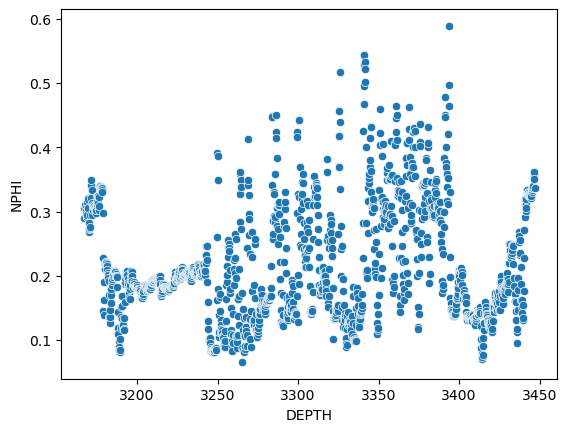

In [4]:
sns.scatterplot(data=n2, x="DEPTH", y="NPHI")

In [5]:
layers = n2.dropna(subset="MARKERS")[["DEPTH", "MARKERS"]]
layers

,DEPTH,MARKERS
60,3179.0,1.0
373,3231.0,10.0
481,3249.0,2.0
774,3299.0,3.0
1296,3394.0,4.0
1573,3440.0,5.0


# Create a composite document

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


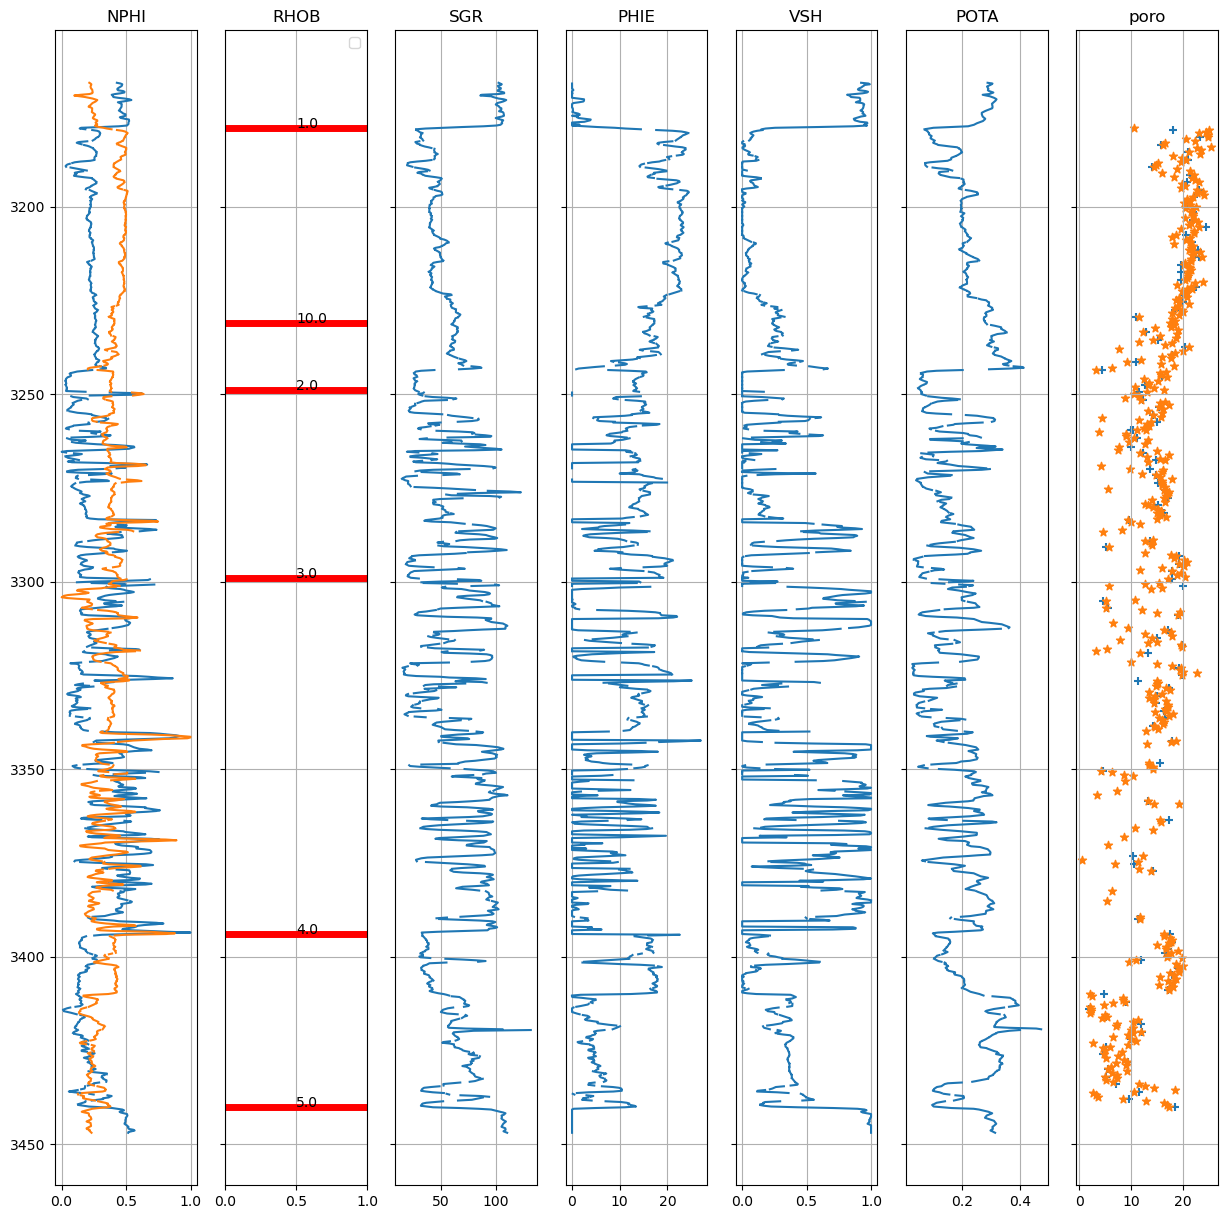

In [6]:
from sklearn.preprocessing import minmax_scale
ncols = 7
# TODO: flip vertically
fig, axs = plt.subplots(ncols=ncols, sharey=True, figsize=(15, 15))
axs[0].plot(minmax_scale(n2.NPHI), n2.DEPTH)
axs[0].plot([1-x for x in minmax_scale(n2.RHOB)], n2.DEPTH)# implement proper scale
# axs[1].bar(n2.COREFACIES, n2.DEPTH)
for depth, name in zip(layers.DEPTH, layers.MARKERS):
    axs[1].axhline(depth, c="red", lw=5, label=core_facies.get(name))
    axs[1].text(0.5, depth, name)


axs[2].plot(n2["SGR(=GR)"], n2.DEPTH) # TODO: add markers to sgr
axs[3].plot(n2["PHIE"], n2.DEPTH)
axs[4].plot(n2["VSH"], n2.DEPTH)
axs[5].plot(n2["POTA"], n2.DEPTH)

axs[6].scatter(n2.PHIV, n2.DEPTH, label="phiv", marker="+")
axs[6].scatter(n2.PHIH, n2.DEPTH, label="phih", marker="*")

titles = ["NPHI", "RHOB", "SGR", "PHIE", "VSH", "POTA", "poro"]

[axs[x].grid() for x in range(0, ncols)]
[axs[num].set_title(title) for num, title in enumerate(titles)]
[axs[x].invert_yaxis() for x in range(0, ncols)]
axs[1].legend()

## Porosity
We can see a good link between v porosity and h porosity. If it were not the case, vidamus illae res: 
- Depth shift
- Difference between rock under pressure in res and when they are measured @ atmospheric. In this case it was measured with confining pressure so it's not a problem here.
- Drying conditions in lab affecting shales in sample

### Overburden correction
We measure a few points in confinement because it's expensive. From these measuremetns we can then calculate a correction to apply from remaining samples measured without confinement. Need around 15 samples measured in confinement.

## Porosity
We can see a good link between v porosity and h porosity. If it were not the case, vidamus illae res: 
- Depth shift
- Difference between rock under pressure in res and when they are measured @ atmospheric. In this case it was measured with confining pressure so it's not a problem here.

### Overburden correction
We measure a few points in confinement because it's expensive. From these measuremetns we can then calculate a correction to apply from remaining samples measured without confinement. Need around 15 samples measured in confinement.

## 3170 to 3200
Shale indicater have gamma ray, neutron density. When we have feldpars or other non-shaly radioactive minerals such as feldspars, then the gamma ray is no longer a good shale indicator. 
- 3177 High radioactivity, high pota. Don't have organic matter because $\gamma$ and uranium component is not large.
- VSH is 0 so very clean rock
- $\phi$ can be directly read from the middle of the segment

[None, None, None, None, None, None]

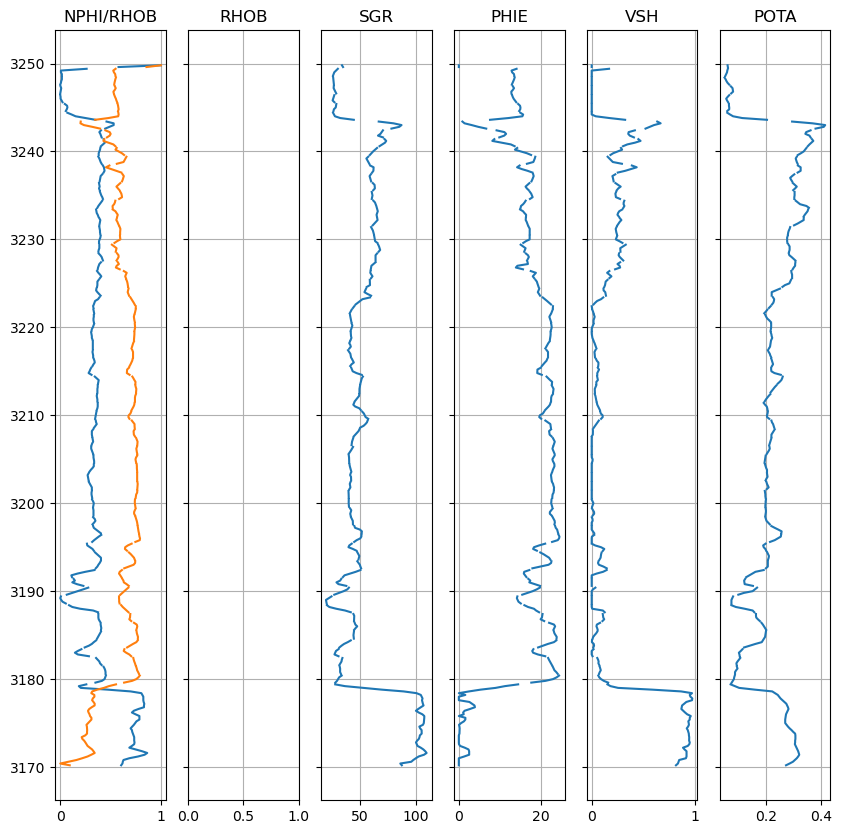

In [7]:
ncols = 6
sub = n2.loc[(n2.DEPTH > 3170) & (n2.DEPTH < 3250), :]
# TODO: flip vertically
fig, axs = plt.subplots(ncols=ncols, sharey=True, figsize=(10, 10))
axs[0].plot(minmax_scale(sub.NPHI), sub.DEPTH)
axs[0].plot([1-x for x in minmax_scale(sub.RHOB)], sub.DEPTH)# implement proper scale
# axs[1].bar(n2.COREFACIES, n2.DEPTH)
axs[2].plot(sub["SGR(=GR)"], sub.DEPTH) # TODO: add markers to sgr
axs[3].plot(sub["PHIE"], sub.DEPTH)
axs[4].plot(sub["VSH"], sub.DEPTH)
axs[5].plot(sub["POTA"], sub.DEPTH)

titles = ["NPHI/RHOB", "RHOB", "SGR", "PHIE", "VSH", "POTA"]

[axs[x].grid() for x in range(0, ncols)]
[axs[num].set_title(title) for num, title in enumerate(titles)]
[axs[x].invert_yaxis() for x in range(0, ncols)]

3245 -> channel sandstone because creates a lobe -> reservoir rock

Coal bed= large neutron value and low rhob value

Silty clays very shaly sandstone -> shale with some silt

# supervised analysis
Using 6 categories described in dictionary above.
```python
labels = n2.COREFACIES
data   = n2[[n2.columns]]
```

## QC
Want to see how our data covers our data

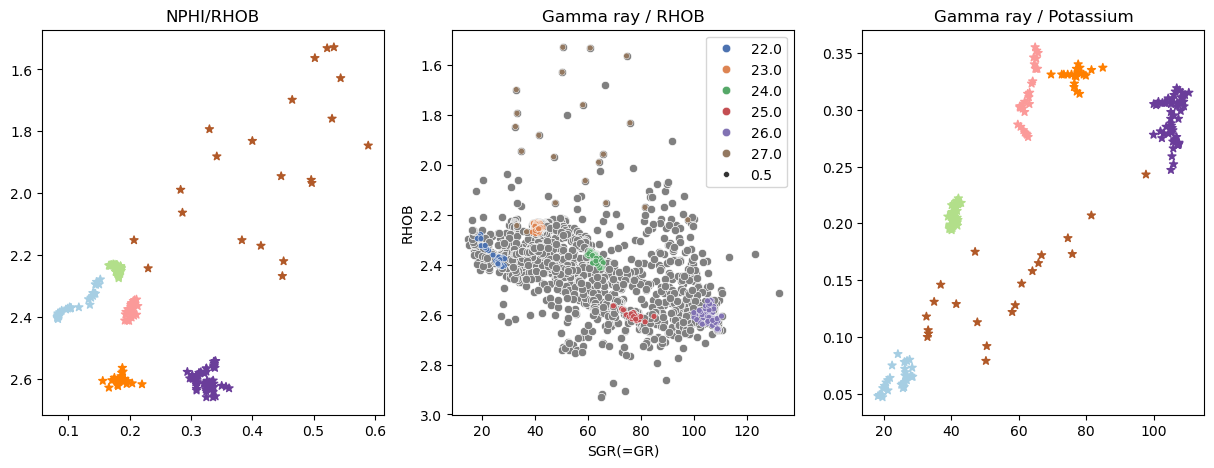

In [19]:

labelled = n2.loc[(n2.COREFACIES<=27)&(n2.COREFACIES>=22), :]

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
# NPHI / RHOB
ax[0].scatter(labelled.NPHI, labelled.RHOB, marker="*", c=labelled.COREFACIES, cmap="Paired")
# Gamma ray / rho B
#ax[1].scatter(labelled["SGR(=GR)"], labelled.RHOB, marker="*",c=labelled.COREFACIES, cmap="Paired")

sns.scatterplot(data=n2, x="SGR(=GR)", y="RHOB", ax=ax[1], c="gray")
sns.scatterplot(data=labelled, x="SGR(=GR)", y="RHOB", ax=ax[1], hue="COREFACIES", palette="deep", size=0.5)

# TODO: convert other plots to sns
ax[2].scatter(labelled["SGR(=GR)"], labelled.POTA, marker="*",c=labelled.COREFACIES, cmap="Paired")
ax[1].invert_yaxis()
ax[0].invert_yaxis()

ax[0].set_title("NPHI/RHOB")
ax[1].set_title("Gamma ray / RHOB")
ax[2].set_title("Gamma ray / Potassium")
ax[1].legend()

Good because good representation of all values and there are no anomalies

# Electrofacies data
Use well data and not log data because we need data on most of the well. 
> Set of depth points where combination of log signature is the same.

## Supervised
- Use core data to label and propagate on other values later on

Finished electrofacies data => for each line have an associated lithology
# Petrophysics
Once we have our data, we work on petrophysics (porosity, permeability ...)

## Variogramm model
Some curve models needs to be implemented, because some values need to be continuous.
For example converting distance into pressure to determine distance from fwl from pressure.

## qc
Very important because it's the heart of Oil In Place calculation. Determined from deep resistivity and Archie law. 

# Supervised analysis

Confusion matrix, without normalization
[[18  0  0  0  0  0]
 [ 0 22  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  8  0  1]
 [ 0  0  0  0 28  0]
 [ 0  0  0  0  0 13]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.88888889 0.         0.11111111]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


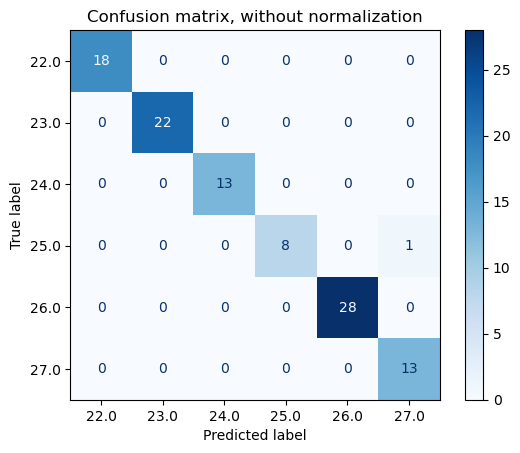

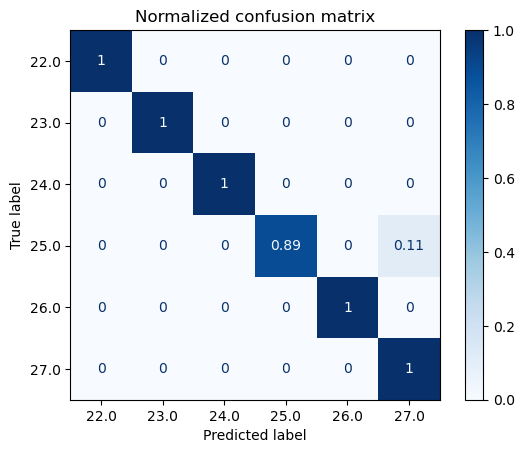

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay

# gamma, rhob, nphi
subset = n2.loc[(n2.COREFACIES<=27)&(n2.COREFACIES>=22), :]
# x values for prediction, y values labels
X, y = subset[["SGR(=GR)", "RHOB", "NPHI"]], subset["COREFACIES"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)


# print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        gnb,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)